# Was a website redesign successful?

### Background

You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site. 

They have been testing the changes for a few weeks, and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

The competition can access from [here](https://app.datacamp.com/learn/competitions/webpage-redesign-test) (*login are required*)

### Task
- Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
- Can the increases observed be explained by randomness? (Hint: Think A/B test)
- Which version of the website should they use?

### Work list

There are some Work list we need to complete as follows:

1. Importing dataset
2. Exploratory Data Analysis (EDA)
3. Data cleansing & wrangling
4. Hypotesis analysis
5. Sampling data
6. Testing hypotesis
7. Conclusion

### 1. Importing Dataset

First we need to import some library. Next we will to check the folder that contains dataset and import the dataset into df variable (DataFrame)

In [94]:
import os 
import math 
import pandas as pd 

In [95]:
os.listdir('./data')

['redesign.csv']

In [96]:
df = pd.read_csv('./data/redesign.csv', delimiter=',')

df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


### 2. Exploratory Data Analysis (EDA)

Let's get some information about data. Check the datatype of each feature and possibility of null value

#### 2.1 General Information

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40484 entries, 0 to 40483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   treatment   40484 non-null  object
 1   new_images  40484 non-null  object
 2   converted   40484 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 949.0+ KB


#### 2.2 Unique Value

From the information above we sure that dataset are not contains any null value. Check unique value of each column to make sure there are no labels other than 'yes' and 'no'

In [98]:
df.treatment.unique()

array(['yes', 'no'], dtype=object)

In [99]:
df.new_images.unique()

array(['yes', 'no'], dtype=object)

In [100]:
df.converted.unique()

array([0, 1], dtype=int64)

Below are means of each column value:

1. If **'treatment'** column data values equals with **1** it means the data is part of **treatment group** or **test group**, **0** means **control group**
2. If **'new_images'** column data values equals with **1** it means page already implementing **new images** else means **old images**
3. If **'converted'** value is **1** it means users already joined the site, otherwise is **0**

In [101]:
import matplotlib.pyplot as plt 
import seaborn as sns 
 
sns.set()

Text(0, 0.5, 'size of data')

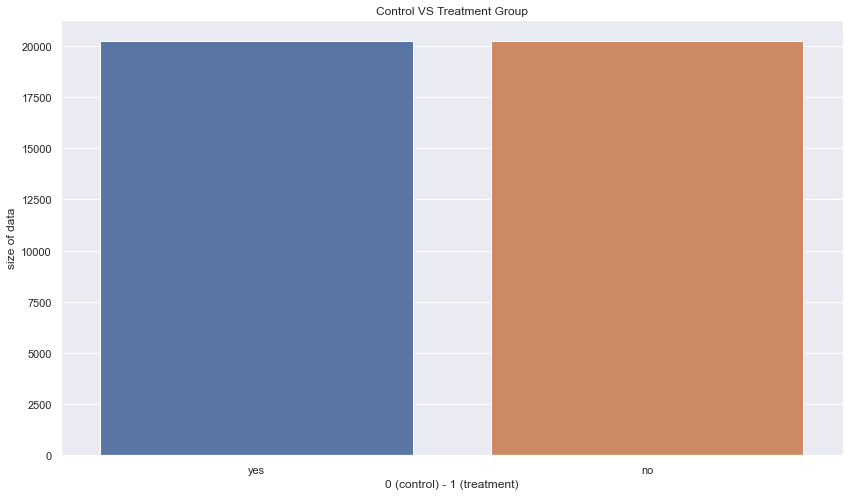

In [102]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x=df.treatment.value_counts().index, y=df.treatment.value_counts(), ax=ax)

plt.title('Control VS Treatment Group')
plt.xlabel('0 (control) - 1 (treatment)')
plt.ylabel('size of data')

Text(0, 0.5, 'size of data')

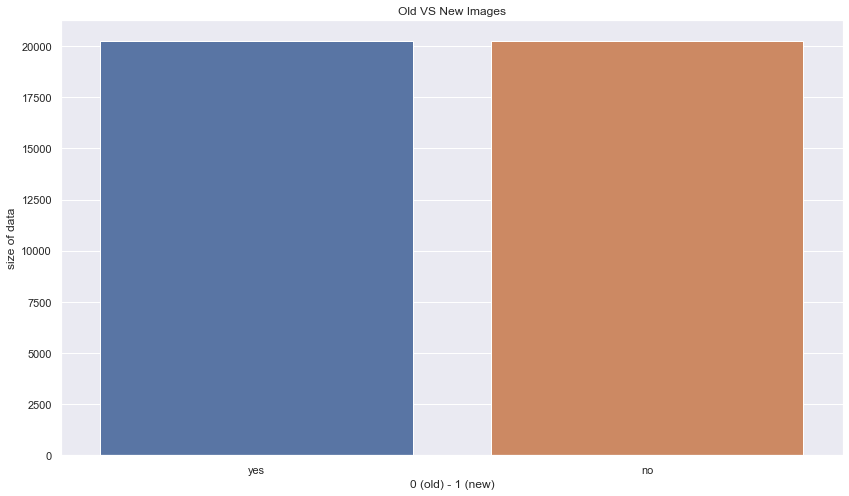

In [103]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x=df.new_images.value_counts().index, y=df.new_images.value_counts(), ax=ax)

plt.title('Old VS New Images')
plt.xlabel('0 (old) - 1 (new)')
plt.ylabel('size of data')

Text(0, 0.5, 'size of data')

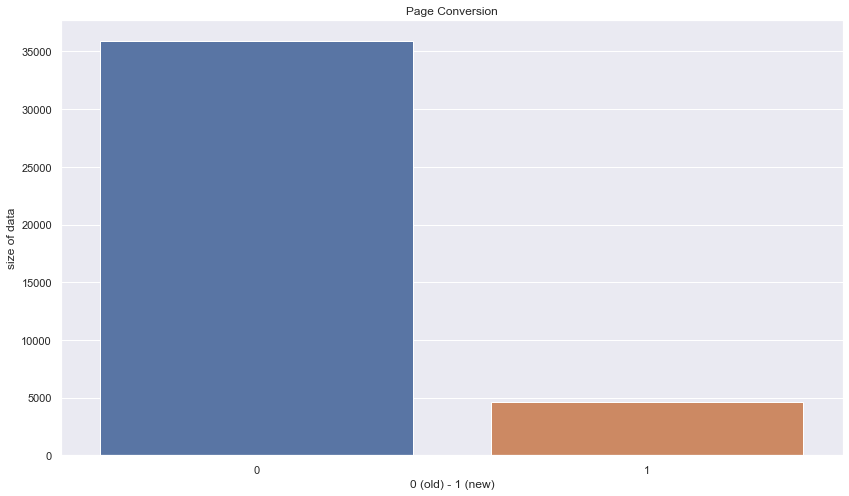

In [104]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x=df.converted.value_counts().index, y=df.converted.value_counts(), ax=ax)

plt.title('Page Conversion')
plt.xlabel('0 (old) - 1 (new)')
plt.ylabel('size of data')

### 3. Data Cleansing & Wrangling

Next our objective to convert 'treatment' and 'new_images' column from object into int64 datatype

In [105]:
df = df.replace({'yes': 1, 'no': 0})

In [106]:
df.head()

,treatment,new_images,converted
0,1,1,0
1,1,1,0
2,1,1,0
3,1,0,0
4,0,1,0


### 4. Hypotesis Analysis

#### 4.1 Conversion Rate

So far we dont perform any calculation for conversion rate. Let's make some calculation of conversion rate for 4 kind of group, old page, new page, old image and new image

In [107]:
row_size = df.shape[0] 

old_page_cr = df[df.converted == 0].shape[0] / row_size
new_page_cr = df[df.converted == 1].shape[0] / row_size
old_images_cr = df[df.new_images == 0].shape[0] / row_size
new_images_cr = df[df.new_images == 1].shape[0] / row_size

print('Old page conversion rate : %.2f%%' % (old_page_cr * 100))
print('New page conversion rate : %.2f%%' % (new_page_cr * 100))
print('Old images conversion rate : %.2f%%' % (old_images_cr * 100))
print('New images conversion rate : %.2f%%' % (new_images_cr * 100))

Old page conversion rate : 88.66%
New page conversion rate : 11.34%
Old images conversion rate : 50.00%
New images conversion rate : 50.00%


#### 4.2 Possibility for Increasing Conversion Rate

Since our new page conversion rate is 11.34%, we now try to assumed that conversion rate can be increased by 2%

In [108]:
new_cr = round(new_page_cr + (2 / 100), 4)

print('New conversion rate of new page : %.2f%%' % (new_cr * 100))

New conversion rate of new page : 13.34%


#### 4.3 Hypotesis

We assumed that conversion rate can be increased by 2%. It seems realistic ? we can perform two-tailed test as kind of Null hypotesis (denoted as **$H_0$**) to check that possiblity.

Let's define our hypotesis as follows:
 - **$H_0$** : Our new design significantly increased by 2%
 - **$H_1$** : Our new design not significantly increased by 2%

To perform hypotesis test, there are some term we might know first:
 - **Confidence interval** : the number of probability that indicates our result statistically confident. We can set confidence interval by 95%
 - **$p$-value** : the probability that difference between the two values is just because of random chance. If the score less than 0.05 we can reject the null hypotesis
 - **Significance value** : denoted as **$a$** the probability to reject null hypotesis
 - **Power of the test** : (1 - $\beta$) the probability of finding a statistical difference between the groups in our test when a difference is actually present. Commonly set to 0.8
 - **Effect size** : The difference of our convension rate and expectation score

### 5. Sampling Data

#### 5.1 Resampling data
We need to find the number of sample that fit with our case by calculating effect size and perform power calculation

In [109]:
from statsmodels.stats.api import proportion_effectsize
from statsmodels.stats.api import NormalIndPower

effect_size = proportion_effectsize(new_page_cr, new_cr)

n_sample = NormalIndPower().solve_power(
    effect_size=effect_size,
    alpha=0.05,
    power=0.8
)

n_sample = round(n_sample)

print('Current conversion rate : %.2f%% ' % (new_page_cr * 100))
print('Target conversion rate : %.2f%% ' % (new_cr * 100))
print('Number of required sample : %d ' % (n_sample))

Current conversion rate : 11.34% 
Target conversion rate : 13.34% 
Number of required sample : 4218 


Get random sample for **treatment** and **control group** using **'n_sample'** variable as number of random sample data

In [110]:
treatment = df[df.treatment == 1].sample(n=n_sample) 
control = df[df.treatment == 0].sample(n=n_sample)

In [111]:
treatment.head()

,treatment,new_images,converted
22228,1,1,0
25548,1,0,0
7268,1,0,0
31101,1,1,0
22925,1,0,1


In [112]:
control.head()

,treatment,new_images,converted
684,0,0,0
9429,0,0,0
25664,0,0,0
27550,0,0,0
327,0,0,0


#### 5.2 Grouping data

In [113]:
ab_test = pd.concat([treatment, control]).reset_index()

ab_test.head()

,index,treatment,new_images,converted
0,22228,1,1,0
1,25548,1,0,0
2,7268,1,0,0
3,31101,1,1,0
4,22925,1,0,1


In [114]:
import numpy as np
from scipy.stats import sem

metrics = ab_test.groupby('treatment')['converted']

metrics = metrics.agg([np.mean, np.std, sem])

metrics.columns = ['mean', 'standard_deviation', 'standard_error']

metrics.reset_index()

,treatment,mean,standard_deviation,standard_error
0,0,0.108345,0.310853,0.004786
1,1,0.114746,0.318753,0.004908


### 6. Testing Hypotesis
Find the p-value to testing the null hypotesis and min-max value of each group by 95% confidence interval

In [115]:
from statsmodels.stats.api import proportions_ztest
from statsmodels.stats.api import proportion_confint

control_res = ab_test[ab_test.treatment == 0]['converted']
treatment_res = ab_test[ab_test.treatment == 1]['converted']

sum = [control_res.sum(), treatment_res.sum()]
nobs = [control_res.count(), treatment_res.count()]

z_score, p_val = proportions_ztest(sum, nobs=nobs)
(min_control, min_treatment), (max_control, max_treatment) = proportion_confint(sum, nobs=nobs)

print('z score : %f \np-value : %f' % (z_score, p_val))
print('Control 95%% confidence interval :  [%.2f%%, %.2f%%]' % (min_control * 100, max_control * 100))
print('Treatment 95%% confidence interval :  [%.2f%%, %.2f%%]' % (min_treatment * 100, max_treatment * 100))

z score : -0.933795 
p-value : 0.350410
Control 95% confidence interval :  [9.90%, 11.77%]
Treatment 95% confidence interval :  [10.51%, 12.44%]


### 7. Conclusion
After the proccess below, we can conclude that:

1. Conversion rate by group
 - Old page conversion rate : 88.66%
 - New page conversion rate : 11.34%
 - Old images conversion rate : 50.00%
 - New images conversion rate : 50.00%
2. Conversion rate of new page : 11.34%
3. Due the number of p-value (0.35041) below our treeshold ($a$ = 0.05), we can statistically can reject the null hypotesis. It means that our new page design not increased by 2%. But by 95% confidence interval our new page conversion rate about 10.51% - 12.44%

*Reference*

- [A/B testing: A step-by-step guide in Python](https://towardsdatascience.com/ab-testing-with-python-e5964dd66143) - *Renato Fillinich (Towards Data Science)*
- [Null hypotesis](https://en.wikipedia.org/wiki/Null_hypothesis) - *wikipedia*
- [A/B Testing for Data Science using Python – A Must-Read Guide for Data Scientists](https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/) - *analytics vidhya*